## python 패키지 불러오기

In [1]:
# 데이터 구성 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


%matplotlib inline

In [2]:
# matplotlib 패키지 한글 깨침 처리
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family = 'AppleGothic')

<br>

# 1. 표준정규분포 (Standard Normal Distribution)
---

## ▪️ 정의
- 정규분포 밀도함수를 통해 X를 Z로 **정규화**함으로써, **평균이 0, 표준편차가 1**인 표준정규분포

## ▪️ 용도
- z-분포로 하는 검정(test)를 z-검정(z-test)라고 한다.

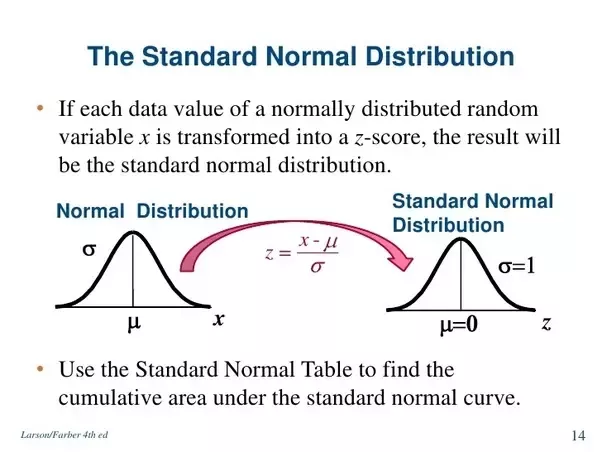

## ▪️ 특징
- 평균=0, 분산=1^
- 종모양이며, 0을 중심으로 대칭
- 기호 : Z~N(0,1^)

## ▪️ 확률계산과 Z값 계산
- 정규분포를 표준정규분포로 변환하여, 표준정규분포표를 이용하여 확률을 계산
- 표준화 Z = X-μ/σ
- z 점수들의 평균은 '0'이고 표준편차는 '1'이 됨

<br>

# 2. t-분포 (t-Distribution)
---

## ▪️ 정의
- **정규분포의 평균을 측정할 때 주로 사용**
- 표준정규분포와 유사하게 0을 중심으로 좌우대칭
- 표준정규분포보다 평평하고 기다란 꼬리를 가짐(양쪽 꼬리가 두터운 형태)
- <u>자유도에 따라 분포모양이 달라짐</u>

## ▪️ 용도
- **모집단의 평균 추정 및 검정**
- 모평균의 추정 및 검정에서 모표준편차를 모를 때 정규분포 대신 사용됨

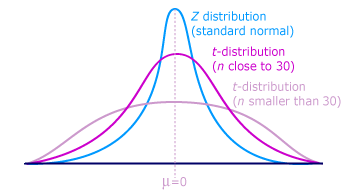

## ▪️ 특징
- t-분포는 **자유도(df)** 라는 모수에 의해 모양이 결정됨 (df=포본크기-1)
- 정규분포보다 더 넓고, 꼬리부분이 더 평평
- 대칭형이며 종모양이라는 점에서 정규분포와 형태가 비슷
- 표본 크기가 더 적으면 적을수록 분포의 꼬리는 더 평평해짐

<br>

# 3. 연습 및 실습 (t-분포)
---

## [연습1]

In [3]:
t = 1.53
df = 5

# 누적확률 값 계산
prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}%".format(prob*100))

P(T<=F): 90.671%


## [실습1]

In [4]:
t = 2.0
df = 100

# 누적확률 값 계산
prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}%".format(prob*100))

P(T<=F): 97.589%


<br>

# 4. 카이제곱 분포
---

## ▪️ 정의
- 정규분포를 따르는 모집단에서 **크기가 n인 표본을 무작위로 반복 추출**하였을 때, 각 **표본에 대해 구한 표본분산**들을 카이제곱 분포를 따름

## ▪️ 용도
- 모집단의 **분산 추정**
- **빈도 기반의 분포** 또는 **형태 적합도 검정**
- 여러 **집단 간**의 **독립성/동질성** 검정

<br>

# 4. 연습 및 실습 (카이제곱 분포)
---

## [연습1]

**Random Data 생성 : n=1000, degree of freedom=10**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

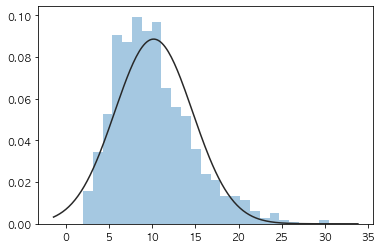

In [5]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 자유도:10, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df=10, size=1000)

# histogram, fit : 정규분포 선 생성, kde: 카이제곱분포의 kde 생성안함(kde는 Kernel Density Estimate 를 하여 커널 밀도 함수 곡선을 그리는 것)
sns.distplot(chisq_df10, fit=stats.norm, kde=False)

**Random Data 생성 : n=1000, degree of freedom=40**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

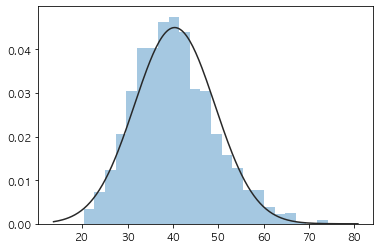

In [6]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 자유도:40, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df40 = np.random.chisquare(df=40, size=1000)

# histogram, fit : 정규분포 선 생성, kde: 카이제곱분포의 kde 생성안함
sns.distplot(chisq_df40, fit=stats.norm, kde=False)

## [실습1]

**Random Data 생성 : n=1000, degree of freedom =3**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

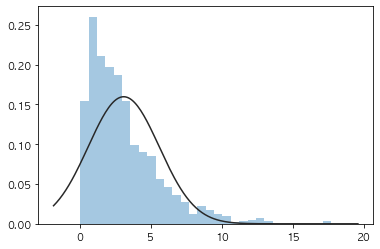

In [7]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 자유도:3, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df3 = np.random.chisquare(df=3, size=1000)

# histogram, fit : 정규분포 선 생성, kde: 카이제곱분포의 kde 생성안함
sns.distplot(chisq_df3, fit=stats.norm, kde=False)

**Random Data 생성 : n=1000, degree of freedom=50**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

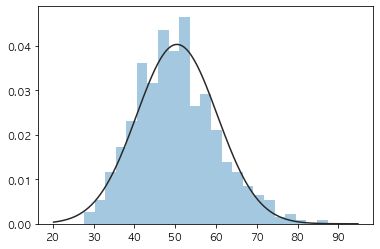

In [8]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 자유도:50, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df50 = np.random.chisquare(df=50, size=1000)

# histogram, fit : 정규분포 선 생선, kde: 카이제곱분포의 kde 생성안함
sns.distplot(chisq_df50, fit=stats.norm, kde=False)

- n=1000일 때, 자유도가 커질수록 생성되는 그래프가 정규분포에 가까워지는 것을 확인할 수 있다.

## [연습2]

In [9]:
chisq = 10
df = 30

# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq,prob))

P(X<=10): 0.0002


## [실습2]

In [10]:
chisq = 3.0
df = 8

# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq,prob))

P(X<=3.0): 0.0656


<br>

# 5. F-분포 (F-Distribution)
---

## ▪️ 정의
- **분산이 같은 두 정규모집단**으로부터 크기 n1과 크기 n2의 **확률 표본을 반복하여 독립적으로 추출**한 후, 구한 **두 표본분산의 비율들의 표본 분포**

## ▪️ 용도
- 두 분포의 분산을 비교하는데 흔히 활용
- ANOVA에서는 그룹 내 변동과 그룹간 변동으로 여러 개의 평균값을 비교하는데 활용

## ▪️ 특징
- 카이제곱분포와 마찬가지로, 종형의 대칭 분포 아님
- 표준정규분포를 제곱하여 합한 카이제곱분포 2개를 서로 나눈 값이므로, **0보다 큰 영역에서만 그려짐**
- F(n1,n2)와 1/F(n2,n1)은 동일한 분포 가짐
- **t분포를 제곱하면 F분포를 하게 됨**

<br>

# 6. 연습 및 실습 (F-분포)
---

## [연습1]

In [11]:
f = 2.0
dfnum = 15
dfden = 15

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob*100))

P(X<=F): 90.447


## [실습1]

In [12]:
f = 1.5
dfnum = 10
dfden = 100

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob*100))

P(X<=F): 84.957


<br>

# 7.  와이블 분포 (Weibull-Distribution)
---

## ▪️ 정의
- 지수분포를 보다 일반화 시켜, 여러 다양한 확률분포 형태를 모두 나타낼 수 있도록 고안됨
    - 신뢰성 분야의 응용에서 자주 사용되는 수명 분포(부품의 고장까지의 시간, 수명 등..)

## ▪️ 특징
- 척도모수(scale parameter)와 형상모수(shape parameter)에 따라 분포 모양 변함
    - 형상모수 1인 경우, 지수 분포(exponential distribution)
    - 형상모수 2인 경우, 라이레히 분포(rayleigh distribution)

<br>

# 8. 연습 및 실습 (와이블 분포)
---

## [연습1]

In [13]:
x = 1500
alpha = 2.2
beta = 1200

# 누적확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale=beta)

print("P(X<=x): {:.3f}".format((1-prob)*100))

P(X<=x): 19.518


## [실습1]

In [14]:
x = 2500
alpha = 5.2
beta = 2200

# 누적확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale=beta)

print("P(X<=x): {:.3f}".format((1-prob)*100))

P(X<=x): 14.313


<br>

# 9. 이항분포 (Binomial Distribution)
---

## ▪️ 베르누이 실행
- 표본공간이 두 개의 상호배타적인 원서로 구성된 실험의 시행
- 매번 실행마다 이 두 개의 원소 중에서 하나만이 실험의 결과로 나타남 (예: 앞면 또는 뒷면)

## ▪️ 베르누이 변수의 정의
- 확률변수 X가 단지 두 개의 값 중에 하나를 취할 때, 즉 Sx={0,1}이고 P(X=1)=p일 때, 변수 X는 모수가 p인 베르누이 분포를 따름

## ▪️ 이항분포 정의
- 베르누이 실험을 여러 차례 시행하여, 특정한 횟수의 성공/실패와 같은 확률을 알고자 할 때 사용되는 분포

## ▪️ n과 p의 값에 따른 이항분포 그래프 유형
- 일반적으로 **p가 0.5에 수렴**하고, **n이 무한대(inf)에 수렴**할 때, 이항분포는 **정규분포 곡선에 가까워짐**

<br>

# 10. 연습 및 실습 (이항 분포)
---

## [연습1]

In [15]:
# n의 수
n = 3

for i in range(n+1):
    # 이항분포 probabillity mass function
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


## [실습1] 

In [16]:
# n의 수
n = 5

print("5대의 차량을 임의로 선택했을 때, 불량대수가 나올 확률은 (X=불량차량대수)")
for i in range(n+1):
    # 이항분포 probabillity mass function
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

5대의 차량을 임의로 선택했을 때, 불량대수가 나올 확률은 (X=불량차량대수)
P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


<br>

# 11. 포아송 분포 (Poisson Distribution)
---

## ▪️ 정의
- 일정한 시간 또는 공간에서 발생하는 성공횟수에 대한 이산확률분포
    - 예) 1km도로에 있는 흠집의 수, 자동차 대리점에서 하루에 차가 x대 이상 팔릴 확률 등

<br>

# 12. 연습 및 실습 (포아송 분포)
---

## [연습1] 

In [17]:
# 평균
mu = 2

# 1분당 3번의 전화가 걸려올 확률
prob = stats.poisson.pmf(3, mu)

# 1분당 최대 2회 이하의 전화가 걸려올 확률
cdf_prob = stats.poisson.cdf(2, mu)
print("1분당 {0}번의 전화가 걸려올 확률: {1:.1f}%".
     format(3, prob*100))
print("1분당 최대 {0}번 이하의 전화가 걸려올 확률: {1:.1f}%".
     format(2, cdf_prob*100))

1분당 3번의 전화가 걸려올 확률: 18.0%
1분당 최대 2번 이하의 전화가 걸려올 확률: 67.7%


## [실습1] 

In [18]:
# 평균
mu = 3

#10시-11시 사이, 2명의 손님이 도착할 확률
prob = stats.poisson.pmf(2, mu)
print("10시에서 11시 사이, {0}명의 손님이 도착할 확률: {1:.1f}%".
     format(2, prob*100))

# 1명 이하의 손님이 도착할 확률
cdf_prob1 = stats.poisson.cdf(1, mu)
print("10시에서 11시 사이, {0}명 이하의 손님이 도착할 확률: {1:.1f}%".
     format(1, cdf_prob1*100))

# 3명 이상의 손님이 도착할 확률
cdf_prob2 = stats.poisson.cdf(3, mu)
print("10시에서 11시 사이, {0}명 이상의 손님이 도착할 확률: {1:.1f}%".
     format(3, cdf_prob2*100))

10시에서 11시 사이, 2명의 손님이 도착할 확률: 22.4%
10시에서 11시 사이, 1명 이하의 손님이 도착할 확률: 19.9%
10시에서 11시 사이, 3명 이상의 손님이 도착할 확률: 64.7%
